In [1]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import nltk 
from nltk.stem.porter import *

In [7]:
import pymorphy2

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Будем решать задачу сентимент-анализа. В архиве data/sentiment analisys.zip лежит несколько эксель файлов с твитами разных пользователей на разных языках (один файл - один язык).
##### Нужно выбрать один из файлов и провести над ним работу.

возьмём файл по Бирюлёво

In [9]:
df_B = pd.read_excel('data/birulevo sentiment coded.xlsx')
df_B

,user,tweet,SENTIMENT,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,1.0,POSITIVE
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,NaN,2.0,NEUTRAL
2,White_technolog,у районной управы собираются местные жители #б...,2,NaN,3.0,NEGATIVE
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,NaN,NaN,NaN
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,NaN,NaN,NaN
...,...,...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,NaN,NaN,NaN
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,NaN,NaN,NaN
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,NaN,NaN,NaN
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,NaN,NaN,NaN


удалим лишнее

In [10]:
df_B = df_B[['user','tweet','SENTIMENT']].dropna()
df_B

,user,tweet,SENTIMENT
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1
2,White_technolog,у районной управы собираются местные жители #б...,2
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3
...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2


### easy  
##### оценить сбалансированность классов  
##### удалить пунктуацию из датасета  
##### преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

**оценка сбалансированности классов**

In [11]:
df_B.loc[df_B['SENTIMENT']==1, 'sent_w'] = 'positive'
df_B.loc[df_B['SENTIMENT']==2, 'sent_w'] = 'neutral'
df_B.loc[df_B['SENTIMENT']==3, 'sent_w'] = 'negative'
df_B

,user,tweet,SENTIMENT,sent_w
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,positive
2,White_technolog,у районной управы собираются местные жители #б...,2,neutral
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,neutral
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,negative
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3,negative
...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,neutral
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,neutral
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,negative
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,neutral


<AxesSubplot:>

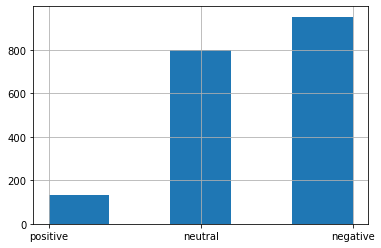

In [12]:
df_B.sent_w.hist(bins=5)

**сбалансированности нет: больше всего негативных сообщений, позитивных совсем мало**

**удаление пунктуации**

In [13]:
import re

In [14]:
for i in range(len(df_B)):
    a = str(df_B.iloc[i,1])
    b = re.sub(r'[^\w\s]','', a)
    df_B.loc[df_B.index==(i+1), 'tweet_bz'] = b
df_B

,user,tweet,SENTIMENT,sent_w,tweet_bz
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,positive,в вост бирюлево на одну палатку с кошатиной ст...
2,White_technolog,у районной управы собираются местные жители #б...,2,neutral,у районной управы собираются местные жители би...
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,neutral,tvrain тем временем конная полиция добралась д...
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,negative,в центре появились тощие прыщавые мужичонки с ...
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3,negative,как пишет товарищ в смс на площади революции ч...
...,...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,neutral,наш корр dmitryhorse ведет трансляцию из бирюлево
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,neutral,gazetaru мид ответил на заявление германии о б...
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,negative,rt_russian азербайджанские радикалы пригрозили...
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,neutral,rt_russian эксклюзив новые кадры задержания по...


**преобразование датасета в TF-IDF**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [16]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df_B.tweet_bz)

**разделение на train и test**

In [29]:
df_B['sent_w'] = pd.Categorical(df_B['sent_w'])
df_B['sent_code'] = df_B.sent_w.cat.codes
df_B

,user,tweet,SENTIMENT,sent_w,tweet_bz,sent_code
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,positive,в вост бирюлево на одну палатку с кошатиной ст...,2
2,White_technolog,у районной управы собираются местные жители #б...,2,neutral,у районной управы собираются местные жители би...,1
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,neutral,tvrain тем временем конная полиция добралась д...,1
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,negative,в центре появились тощие прыщавые мужичонки с ...,0
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3,negative,как пишет товарищ в смс на площади революции ч...,0
...,...,...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,neutral,наш корр dmitryhorse ведет трансляцию из бирюлево,1
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,neutral,gazetaru мид ответил на заявление германии о б...,1
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,negative,rt_russian азербайджанские радикалы пригрозили...,0
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,neutral,rt_russian эксклюзив новые кадры задержания по...,1


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, df_B.sent_code, train_size=0.8)

**прогнозирование с LogisticRegression и RandomForestClassifier**

In [31]:
from sklearn.linear_model import SGDRegressor,LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, f1_score

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)
f1_score(y_pred, y_test, average='weighted')
print('accuracy: ', round(accuracy_score(y_pred, y_test),3))
print('f1_score: ', round(f1_score(y_pred, y_test, average='weighted'),3))

accuracy:  0.688
f1_score:  0.716


In [33]:
confusion_matrix(y_test, y_pred)

array([[170,  30,   0],
       [ 64,  90,   0],
       [ 17,   7,   0]], dtype=int64)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)
f1_score(y_pred, y_test, average='weighted')
print('accuracy: ', round(accuracy_score(y_pred, y_test),3))
print('f1_score: ', round(f1_score(y_pred, y_test, average='weighted'),3))

accuracy:  0.675
f1_score:  0.699


In [36]:
confusion_matrix(y_test, y_pred)

array([[173,  26,   1],
       [ 73,  80,   1],
       [ 19,   3,   2]], dtype=int64)

### normal  
##### удалить стоп-слова из датасета, использовать стеммер Портера (лежит в src/porter.py)  
##### использовать пайплайн для TF-IDF и модели машинного обучения  
##### подобрать параметры, сравнить качество нескольких моделей

**удаление стоп-слов, стеммер Портера**

In [37]:
import nltk 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
Porter = PorterStemmer()

In [38]:
for i in range(len(df_B)):
    ast = str(df_B.iloc[i,4])
    bst = [' '.join([Porter.stem(j) for j in ast.split()])]
    df_B.loc[df_B.index==(i+1), 'tweet_stem_Porter'] = bst
    #df_B.loc[df_B.index==(i+1), 'tweet_stem_Porter'] = [' '.join([Porter.stem(j) for j in str(df_B.iloc[i,4]).split()])]
df_B

,user,tweet,SENTIMENT,sent_w,tweet_bz,sent_code,tweet_stem_Porter
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,positive,в вост бирюлево на одну палатку с кошатиной ст...,2,в вост бирюлево на одну палатку с кошатиной ст...
2,White_technolog,у районной управы собираются местные жители #б...,2,neutral,у районной управы собираются местные жители би...,1,у районной управы собираются местные жители би...
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,neutral,tvrain тем временем конная полиция добралась д...,1,tvrain тем временем конная полиция добралась д...
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,negative,в центре появились тощие прыщавые мужичонки с ...,0,в центре появились тощие прыщавые мужичонки с ...
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3,negative,как пишет товарищ в смс на площади революции ч...,0,как пишет товарищ в смс на площади революции ч...
...,...,...,...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,neutral,наш корр dmitryhorse ведет трансляцию из бирюлево,1,наш корр dmitryhors ведет трансляцию из бирюлево
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,neutral,gazetaru мид ответил на заявление германии о б...,1,gazetaru мид ответил на заявление германии о б...
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,negative,rt_russian азербайджанские радикалы пригрозили...,0,rt_russian азербайджанские радикалы пригрозили...
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,neutral,rt_russian эксклюзив новые кадры задержания по...,1,rt_russian эксклюзив новые кадры задержания по...


так как Porter плохо работает с русским языком, изменений после применения стемминга, кажется, нет

**удаление стоп-слов, стеммер SnowBall**

In [40]:
from nltk.stem.snowball import SnowballStemmer
Snowball=SnowballStemmer(language = 'russian')

In [41]:
for i in range(len(df_B)):
    ast = str(df_B.iloc[i,4])
    bst = [' '.join([Snowball.stem(j) for j in ast.split()])]
    df_B.loc[df_B.index==(i+1), 'tweet_stem_Snow'] = bst
    #df_B.loc[df_B.index==(i+1), 'tweet_stem_Snow'] = [' '.join([Snowball.stem(j) for j in str(df_B.iloc[i,4]).split()])]  
df_B[['tweet_bz', 'tweet_stem_Porter', 'tweet_stem_Snow']]

,tweet_bz,tweet_stem_Porter,tweet_stem_Snow
1,в вост бирюлево на одну палатку с кошатиной ст...,в вост бирюлево на одну палатку с кошатиной ст...,в вост бирюлев на одн палатк с кошатин стал ме...
2,у районной управы собираются местные жители би...,у районной управы собираются местные жители би...,у район управ собира местн жител бирюлев live ...
3,tvrain тем временем конная полиция добралась д...,tvrain тем временем конная полиция добралась д...,tvrain тем времен кон полиц добра до бирюлев p...
4,в центре появились тощие прыщавые мужичонки с ...,в центре появились тощие прыщавые мужичонки с ...,в центр появ тощ прыщав мужичонк с красн повяз...
5,как пишет товарищ в смс на площади революции ч...,как пишет товарищ в смс на площади революции ч...,как пишет товарищ в смс на площад революц черн...
...,...,...,...
1886,наш корр dmitryhorse ведет трансляцию из бирюлево,наш корр dmitryhors ведет трансляцию из бирюлево,наш корр dmitryhorse ведет трансляц из бирюлев
1887,gazetaru мид ответил на заявление германии о б...,gazetaru мид ответил на заявление германии о б...,gazetaru мид ответ на заявлен герман о беспоря...
1888,rt_russian азербайджанские радикалы пригрозили...,rt_russian азербайджанские радикалы пригрозили...,rt_russian азербайджанск радикал пригроз приня...
1889,rt_russian эксклюзив новые кадры задержания по...,rt_russian эксклюзив новые кадры задержания по...,rt_russian эксклюз нов кадр задержан подозрева...


со Снежком результат интересней

**удаление стоп-слов, стеммер Портера для русского языка**

In [42]:
class Porter:
    PERFECTIVEGROUND =  re.compile(u"((ив|ивши|ившись|ыв|ывши|ывшись)|((?<=[ая])(в|вши|вшись)))$")
    REFLEXIVE = re.compile(u"(с[яь])$")
    ADJECTIVE = re.compile(u"(ее|ие|ые|ое|ими|ыми|ей|ий|ый|ой|ем|им|ым|ом|его|ого|ему|ому|их|ых|ую|юю|ая|яя|ою|ею)$")
    PARTICIPLE = re.compile(u"((ивш|ывш|ующ)|((?<=[ая])(ем|нн|вш|ющ|щ)))$")
    VERB = re.compile(u"((ила|ыла|ена|ейте|уйте|ите|или|ыли|ей|уй|ил|ыл|им|ым|ен|ило|ыло|ено|ят|ует|уют|ит|ыт|ены|ить|ыть|ишь|ую|ю)|((?<=[ая])(ла|на|ете|йте|ли|й|л|ем|н|ло|но|ет|ют|ны|ть|ешь|нно)))$")
    NOUN = re.compile(u"(а|ев|ов|ие|ье|е|иями|ями|ами|еи|ии|и|ией|ей|ой|ий|й|иям|ям|ием|ем|ам|ом|о|у|ах|иях|ях|ы|ь|ию|ью|ю|ия|ья|я)$")
    RVRE = re.compile(u"^(.*?[аеиоуыэюя])(.*)$")
    DERIVATIONAL = re.compile(u".*[^аеиоуыэюя]+[аеиоуыэюя].*ость?$")
    DER = re.compile(u"ость?$")
    SUPERLATIVE = re.compile(u"(ейше|ейш)$")
    I = re.compile(u"и$")
    P = re.compile(u"ь$")
    NN = re.compile(u"нн$")

    def stem(word):
        word = word.lower()
        word = word.replace(u'ё', u'е')
        m = re.match(Porter.RVRE, word)
        if m and m.groups():
            pre = m.group(1)
            rv = m.group(2)
            temp = Porter.PERFECTIVEGROUND.sub('', rv, 1)
            if temp == rv:
                rv = Porter.REFLEXIVE.sub('', rv, 1)
                temp = Porter.ADJECTIVE.sub('', rv, 1)
                if temp != rv:
                    rv = temp
                    rv = Porter.PARTICIPLE.sub('', rv, 1)
                else:
                    temp = Porter.VERB.sub('', rv, 1)
                    if temp == rv:
                        rv = Porter.NOUN.sub('', rv, 1)
                    else:
                        rv = temp
            else:
                rv = temp

            rv = Porter.I.sub('', rv, 1)

            if re.match(Porter.DERIVATIONAL, rv):
                rv = Porter.DER.sub('', rv, 1)

            temp = Porter.P.sub('', rv, 1)
            if temp == rv:
                rv = Porter.SUPERLATIVE.sub('', rv, 1)
                rv = Porter.NN.sub(u'н', rv, 1)
            else:
                rv = temp
            word = pre+rv
        return word
    stem=staticmethod(stem)

In [43]:
for i in range(len(df_B)):
    ast = str(df_B.iloc[i,4])
    bst = [' '.join([Porter.stem(j) for j in ast.split()])]
    df_B.loc[df_B.index==(i+1), 'tweet_stem_Porter_rus'] = bst
    #df_B.loc[df_B.index==(i+1), 'tweet_stem_Porter_rus'] = [' '.join([Porter.stem(j) for j in str(df_B.iloc[i,4]).split()])]
df_B[['tweet_bz', 'tweet_stem_Porter', 'tweet_stem_Snow','tweet_stem_Porter_rus']]

,tweet_bz,tweet_stem_Porter,tweet_stem_Snow,tweet_stem_Porter_rus
1,в вост бирюлево на одну палатку с кошатиной ст...,в вост бирюлево на одну палатку с кошатиной ст...,в вост бирюлев на одн палатк с кошатин стал ме...,в вост бирюлев на одн палатк с кошатин стал ме...
2,у районной управы собираются местные жители би...,у районной управы собираются местные жители би...,у район управ собира местн жител бирюлев live ...,у район управ собира местн жител бирюлев live ...
3,tvrain тем временем конная полиция добралась д...,tvrain тем временем конная полиция добралась д...,tvrain тем времен кон полиц добра до бирюлев p...,tvrain тем времен кон полиц добра до бирюлев p...
4,в центре появились тощие прыщавые мужичонки с ...,в центре появились тощие прыщавые мужичонки с ...,в центр появ тощ прыщав мужичонк с красн повяз...,в центр появ тощ прыщав мужичонк с красн повяз...
5,как пишет товарищ в смс на площади революции ч...,как пишет товарищ в смс на площади революции ч...,как пишет товарищ в смс на площад революц черн...,как пишет товарищ в смс на площад революц черн...
...,...,...,...,...
1886,наш корр dmitryhorse ведет трансляцию из бирюлево,наш корр dmitryhors ведет трансляцию из бирюлево,наш корр dmitryhorse ведет трансляц из бирюлев,наш корр dmitryhorse ведет трансляц из бирюлев
1887,gazetaru мид ответил на заявление германии о б...,gazetaru мид ответил на заявление германии о б...,gazetaru мид ответ на заявлен герман о беспоря...,gazetaru мид ответ на заявлен герман о беспоря...
1888,rt_russian азербайджанские радикалы пригрозили...,rt_russian азербайджанские радикалы пригрозили...,rt_russian азербайджанск радикал пригроз приня...,rt_russian азербайджанск радикал пригроз приня...
1889,rt_russian эксклюзив новые кадры задержания по...,rt_russian эксклюзив новые кадры задержания по...,rt_russian эксклюз нов кадр задержан подозрева...,rt_russian эксклюз нов кадр задержан подозрева...


кажется, у Снежка и Портера для русского языка результаты одинаковые

**пайплайн для TF-IDF и модели машинного обучения**

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [45]:
x_train, x_test, y_train, y_test = train_test_split(df_B.tweet_stem_Snow, df_B.sent_code, train_size=0.8)

In [46]:
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression()),
    ]
)

In [47]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [48]:
df_B['tweet_stem_Snow'].iloc[250:255]

251    скор в эфир магомед толбо почетн президент за ...
252    в бирюлев продолжа задержан lifenews pictwitte...
253    полиц провод масштабн проверк в район бирюлев ...
254    посл погром в бирюлев под страж оста 72 участн...
255    срочн 1200 человек задержа в западн бирюлев на...
Name: tweet_stem_Snow, dtype: object

In [49]:
df_B['sent_code'].iloc[250:255]

251    1
252    0
253    1
254    1
255    0
Name: sent_code, dtype: int8

In [50]:
pipeline.predict(df_B['tweet_stem_Snow'].iloc[250:255])

array([1, 0, 1, 1, 1], dtype=int8)

на этой маленькой выборке попадание 4 из 5

In [51]:
y_pred = pipeline.predict(x_test)
accuracy_score(y_pred,y_test)
f1_score(y_pred, y_test, average='weighted')
print('accuracy: ', round(accuracy_score(y_pred, y_test),3))
print('f1_score: ', round(f1_score(y_pred, y_test, average='weighted'),3))

accuracy:  0.696
f1_score:  0.718


**подбор параметров**

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [53]:
params = {
    'vect__max_df' : [0.3, 0.5, 1],
    'vect__min_df' : [0.1, 0.3, 0.7],
    'vect__max_features': [2, 3, 5],
    'tfidf__norm': ['l1', 'l2'],
    'tfidf__sublinear_tf': ['True', 'False'],
    'clf__penalty': ['none', 'l2'],
    'clf__max_iter': [50, 100, 150]
}

pip_search = RandomizedSearchCV(pipeline, params, scoring='accuracy')
pip_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('clf', LogisticRegression())]),
                   param_distributions={'clf__max_iter': [50, 100, 150],
                                        'clf__penalty': ['none', 'l2'],
                                        'tfidf__norm': ['l1', 'l2'],
                                        'tfidf__sublinear_tf': ['True',
                                                                'False'],
                                        'vect__max_df': [0.3, 0.5, 1],
                                        'vect__max_features': [2, 3, 5],
                                        'vect__min_df': [0.1, 0.3, 0.7]},
                   scoring='accuracy')

In [54]:
#если прогонять несколько раз, результаты получаются разные
pip_search.best_estimator_

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.3, max_features=2, min_df=0.1)),
                ('tfidf', TfidfTransformer(norm='l1', sublinear_tf='True')),
                ('clf', LogisticRegression(max_iter=50))])

In [55]:
pipeline = Pipeline(
    [
        ("vect", CountVectorizer(max_df=0.3, max_features=2, min_df=0.1)),
        ("tfidf", TfidfTransformer(norm='l1', sublinear_tf='True')),
        ("clf", LogisticRegression(max_iter=50, penalty='none')),
    ]
)

In [56]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.3, max_features=2, min_df=0.1)),
                ('tfidf', TfidfTransformer(norm='l1', sublinear_tf='True')),
                ('clf', LogisticRegression(max_iter=50, penalty='none'))])

In [57]:
df_B['tweet_stem_Snow'].iloc[250:255]

251    скор в эфир магомед толбо почетн президент за ...
252    в бирюлев продолжа задержан lifenews pictwitte...
253    полиц провод масштабн проверк в район бирюлев ...
254    посл погром в бирюлев под страж оста 72 участн...
255    срочн 1200 человек задержа в западн бирюлев на...
Name: tweet_stem_Snow, dtype: object

In [58]:
df_B['sent_code'].iloc[250:255]

251    1
252    0
253    1
254    1
255    0
Name: sent_code, dtype: int8

In [59]:
pipeline.predict(df_B['tweet_stem_Snow'].iloc[250:255])

array([0, 0, 0, 0, 0], dtype=int8)

In [60]:
y_pred = pipeline.predict(x_test)
accuracy_score(y_pred,y_test)
f1_score(y_pred, y_test, average='weighted')
print('accuracy: ', round(accuracy_score(y_pred, y_test),3))
print('f1_score: ', round(f1_score(y_pred, y_test, average='weighted'),3))

accuracy:  0.582
f1_score:  0.659


после подбора параметров качество стало хуже

**сравнение с другой моделью**

In [61]:
pipeline2 = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf2", RandomForestClassifier()),
    ]
)

In [62]:
pipeline2.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf2', RandomForestClassifier())])

In [63]:
pipeline2.predict(df_B['tweet_stem_Snow'].iloc[250:255])

array([1, 0, 1, 1, 0], dtype=int8)

у RandomForestClassifier на этой маленькой выборке попадание 5/5

In [64]:
y_pred = pipeline2.predict(x_test)
accuracy_score(y_pred,y_test)
f1_score(y_pred, y_test, average='weighted')
print('accuracy: ', round(accuracy_score(y_pred, y_test),3))
print('f1_score: ', round(f1_score(y_pred, y_test, average='weighted'),3))

accuracy:  0.698
f1_score:  0.713


**у модели LogisticRegression и у RandomForestClassifier качество почти одинаковое ( 0,696/0,718 - 0,698/0,713)**

### hard  
##### использовать лемматизатор pymorphy вместо стемминга  
##### в качестве модели использовать градиентный бустинг не из sklearn  
##### подобрать параметры, оценить качество на кросс-валидации

**лемматизатор pymorphy**

In [65]:
import pymorphy2

In [66]:
morph = pymorphy2.MorphAnalyzer()

In [67]:
def lemmatize_word(word):
    return morph.parse(word)[0].normal_form

def preprocess_corpus_lem(corpus):
    return [' '.join(map(lemmatize_word, text.split())) for text in corpus]

In [68]:
df_B['tweet_lem'] = preprocess_corpus_lem(df_B['tweet_bz'])
df_B[['tweet_bz', 'tweet_stem_Snow','tweet_lem']]

,tweet_bz,tweet_stem_Snow,tweet_lem
1,в вост бирюлево на одну палатку с кошатиной ст...,в вост бирюлев на одн палатк с кошатин стал ме...,в вост бирюлёво на один палатка с кошатина ста...
2,у районной управы собираются местные жители би...,у район управ собира местн жител бирюлев live ...,у районный управа собираться местный житель би...
3,tvrain тем временем конная полиция добралась д...,tvrain тем времен кон полиц добра до бирюлев p...,tvrain тем время конный полиция добраться до б...
4,в центре появились тощие прыщавые мужичонки с ...,в центр появ тощ прыщав мужичонк с красн повяз...,в центр появиться тощий прыщавый мужичонка с к...
5,как пишет товарищ в смс на площади революции ч...,как пишет товарищ в смс на площад революц черн...,как писать товарищ в смс на площадь революция ...
...,...,...,...
1886,наш корр dmitryhorse ведет трансляцию из бирюлево,наш корр dmitryhorse ведет трансляц из бирюлев,наш корра dmitryhorse вести трансляция из бирю...
1887,gazetaru мид ответил на заявление германии о б...,gazetaru мид ответ на заявлен герман о беспоря...,gazetaru мид ответить на заявление германия о ...
1888,rt_russian азербайджанские радикалы пригрозили...,rt_russian азербайджанск радикал пригроз приня...,rt_russian азербайджанский радикал пригрозить ...
1889,rt_russian эксклюзив новые кадры задержания по...,rt_russian эксклюз нов кадр задержан подозрева...,rt_russian эксклюзив новый кадр задержание под...


**градиентный бустинг**

In [69]:
import xgboost as xgb

In [70]:
from xgboost import XGBClassifier

In [71]:
x = tfidf.fit_transform(df_B.tweet_lem)
y = df_B.sent_code
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [73]:
#здесь warnings отключить не получилось
import warnings
warnings.filterwarnings("ignore")

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)
f1_score(y_pred, y_test, average='weighted')
print('accuracy: ', round(accuracy_score(y_pred, y_test),3))
print('f1_score: ', round(f1_score(y_pred, y_test, average='weighted'),3))

[19:09:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  0.672
f1_score:  0.685


**подбор параметров**

In [74]:
#здесь warnings отключить не получилось
import warnings
warnings.filterwarnings("ignore")

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 5, 6],
    'booster': ['gbtree', 'gblinear', 'dart']
}

xgb_search = RandomizedSearchCV(XGBClassifier(), params, scoring='accuracy')
xgb_search.fit(x_train, y_train)

[19:09:42] WARNING: ..\src\learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:09:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:09:43] WARNING: ..\src\learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:09:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evalua

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lamb

In [75]:
xgb_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=4, num_parallel_tree=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=None)

In [77]:
import warnings
warnings.filterwarnings("ignore")

model3 = XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None, сolsample_bynode=None, colsample_bytree=None, gamma=None,gpu_id=-1, importance_type='gain', interaction_constraints=None,learning_rate=0.5, max_delta_step=None, max_depth=4,min_child_weight=None, monotone_constraints=None,n_estimators=200, n_jobs=4, num_parallel_tree=None,objective='multi:softprob', random_state=0, reg_alpha=0,reg_lambda=0, scale_pos_weight=None, subsample=None,tree_method=None, validate_parameters=1, verbosity=None)
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
accuracy_score(y_pred, y_test)
f1_score(y_pred, y_test, average='weighted')
print('accuracy: ', round(accuracy_score(y_pred, y_test),3))
print('f1_score: ', round(f1_score(y_pred, y_test, average='weighted'),3))

[20:22:40] WARNING: ..\src\learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  0.672
f1_score:  0.687


качество возросло, но совсем немного

**кросс-валидация**

In [90]:
f1 = f1_score(y_pred, y_test, average='weighted')
cr_val_xgb = cross_val_score(model3, x_train, y_train, error_score=f1)

[20:30:29] WARNING: ..\src\learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:30:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:30] WARNING: ..\src\learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:30:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evalua

In [91]:
print('кросс-валидация на train выборке:',cr_val_xgb)
print('cреднее по кросс-валидации:', round(cr_val_xgb.mean(),3))

кросс-валидация на train выборке: [0.70627063 0.63366337 0.68874172 0.62913907 0.64569536]
cреднее по кросс-валидации: 0.661


на кросс-валидации улучшения нет